# 02. Lab excercies, Supervised learning, KNN

----

1. Implement naive K nearest neighbour regression as a function only using python and numpy. The signature of the functions should be:


    ```
    def knn_regression(x2pred, x_train, y_train, k=10):
        """Return prediction with knn regression."""
        .
        .
        .
        return y_pred
    ```
    
    
2. Apply the KNN regressor on photometric redshift estimation using the provided photoz_mini.csv file. Use a 80-20% train test split. Calculate the mean absolute error of predictions, and plot the true and the predicted values on a scatterplot.

3. Apply the KNN regressor on photometric redshift estimation using the provided photoz_mini.csv file. Use 5 fold cross validation. Estimate the mean and satndard deviation of the MAE of the predictions.

4. Repeat 3 with the KNN regression class from sklearn. Compare the predictions and the runtime.

5. Implement weighted KNN regression and apply it on the same data. Use 5 fold cross validation. Estimate the mean and satndard deviation of the MAE of the predictions. Plot the true and the predicted values from one fold on a scatterplot.

---


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

## 1, Write KNN regressor

In [3]:
def knn_regression(x2pred, x_train, y_train, k=10):
    """Return prediction with knn regression."""
    dist = [((x2pred-xi)**2).sum() for xi in x_train]
    knn = np.argsort(dist)[:k]
    return y_train[knn].mean()

## 2, Apply it Photoz data with 80%-20% split

In [4]:
df = pd.read_csv('../data/photoz_mini.csv')  # load train data
x = df[['u','g','r','i','z']].values  # format x as scipy expects it
y = df['redshift'].values  # format y as scipy expects it

In [5]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size= 0.2)

In [6]:
%%time
yp = [knn_regression(xi, x_train, y_train) for xi in x_test]

CPU times: user 652 ms, sys: 6.47 ms, total: 658 ms
Wall time: 657 ms


(0, 1)

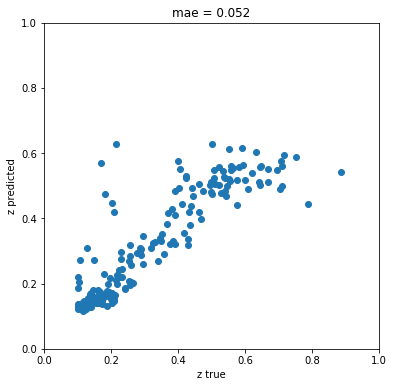

In [7]:
figsize(6,6)
plot(y_test, yp,'o')
xlabel('z true')
ylabel('z predicted')
title('mae = %.3f' % np.mean(np.abs(y_test-yp)))
xlim(0,1)
ylim(0,1)

## 3, Apply it in 5 fold cross validation

In [8]:
from sklearn.model_selection import KFold

In [9]:
%%time
kf = KFold(n_splits=5)
maes = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    yp = [knn_regression(xi, x_train, y_train) for xi in x_test]
    maes.append(np.mean(np.abs(y_test-yp)))
print 'maes = %.4f +/- %.4f' % (np.mean(maes), np.std(maes, ddof=1))  # note ddof!

maes = 0.0487 +/- 0.0031
CPU times: user 3.04 s, sys: 13.8 ms, total: 3.06 s
Wall time: 3.08 s


## 4, Use sklearn, compare results and runtime

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
%%time
knnr = KNeighborsRegressor(n_neighbors=10)
kf = KFold(n_splits=5)
maes = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knnr.fit(x_train, y_train)
    yp = knnr.predict(x_test)
    maes.append(np.mean(np.abs(y_test-yp)))
print 'maes = %.4f +/- %.4f' % (np.mean(maes), np.std(maes, ddof=1))  # note ddof!

maes = 0.0487 +/- 0.0031
CPU times: user 13.6 ms, sys: 1.6 ms, total: 15.2 ms
Wall time: 13.9 ms


## 5, Implement weighted

In [12]:
def knn_regression_w(x2pred, x_train, y_train, k=10):
    """Return predictions with weighted knn regression."""
    dist = np.array([((x2pred-xi)**2).sum() for xi in x_train])
    knn = np.argsort(dist)[:k]
    w = dist[knn]
    return w.mean() * (y_train[knn] * 1./w).mean()

In [13]:
%%time
kf = KFold(n_splits=5)
maes = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    yp = [knn_regression_w(xi, x_train, y_train) for xi in x_test]
    maes.append(np.mean(np.abs(y_test-yp)))
print 'maes = %.4f +/- %.4f' % (np.mean(maes), np.std(maes))

maes = 0.1387 +/- 0.0122
CPU times: user 3.15 s, sys: 24.9 ms, total: 3.17 s
Wall time: 3.21 s


(0, 1)

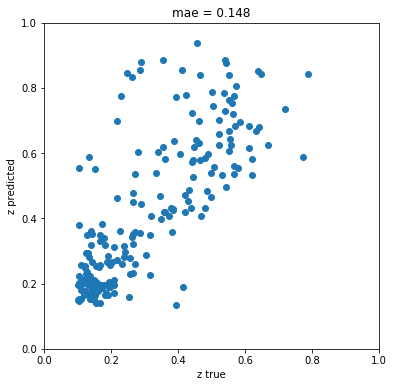

In [14]:
figsize(6,6)
plot(y_test, yp,'o')
xlabel('z true')
ylabel('z predicted')
title('mae = %.3f' % np.mean(np.abs(y_test-yp)))
xlim(0,1)
ylim(0,1)